# Практическая работа № 4.1

1. Загрузка данных
2. Удаление стоп-слов и знаков препинания
3. Предварительная обработка данных
<br>3.1. Подсчёт количества вхождений слова
<br>3.2. Создаём DataFrame (Слово | Количество | Ранг | Процент)
4. Визуализация полученных результатов с помощью библиотеки `matplotlib`
<br>4.1. Создаём гистограмму частоты вхождений слов из текста
<br>4.2. Создаём график типа `TreeMap`
<br>4.3. Создаём график типа `WordCloud`

<a id=1></a>
### Шаг 1. Создайте аналитическую программу, которая считывает текст из файла (файл *.txt ~ 200 Кб).

In [1]:
# импорт библиотек для работы с текстовыми данными
import re # модуль регулярных выражений
import string # модуль для работы со строковыми объектами
import nltk # библиотека Natural Language Toolkit
from nltk.corpus import stopwords
from collections import Counter # счётчик количества вхождений слова

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# настройки визуализации
%config InlineBackend.figure_format='svg' # наиболее чёткое отображение графиков
%matplotlib inline
plt.rc('figure', figsize=(12, 6), facecolor='white')

# pip install squarify
import squarify # библиотека для создания графика типа TreeMap
# pip install wordcloud
from wordcloud import WordCloud # библиотека для создания графика типа `облако слов`

# отключим предупреждения
import warnings
warnings.simplefilter('ignore')

In [2]:
# загружаем текст в переменную
sample_text = open('test.txt', 'r', encoding='utf-8')

In [3]:
# проверяем тип данных
type(sample_text)

_io.TextIOWrapper

In [4]:
tokens = [] # создаём пустой список слов, которые мы найдём в документе
hist = {} # создаём пустой словарь, куда мы поместим связь `слово - количество вхождений слова`
sample_text = open('test.txt', 'r', encoding='utf-8') # открываем файл из адреса, 
                                                      # открываем доступ для его прочтения
                                                      # устанавливаем кодировку utf-8

In [5]:
# удаляем из символов знаки препинания и пробелы
strippables = string.punctuation + string.whitespace 

In [6]:
# с помощью цикла перебираем документ
for line in sample_text:
    line = line.lower() # переводим весь текст в нижний регистр
    # re.sub(pattern, repl, string, count=0, flags=0) -> str шаблон (строка или объект pattern), 
    # вхождение которого в строку нужно заменить
    line = re.sub(r'[^а-яА-Я ^0-9]', '', str(line)) 
    for word in line.split(): # с помощью цикла найденные строки мы разбиваем на слова с помощью split 
        word = word.strip(strippables)
        hist[word] = hist.get(word, 0) + 1
        tokens.append(word) # в пустой список tokens добавляем найденные слова word 

hist
tokens[:100] # выводим список tokens и его первые 100 значений

['рассказ',
 'у',
 'нас',
 'пойдет',
 'в',
 'особенности',
 'о',
 'хоббитах',
 'и',
 'любознательный',
 'читатель',
 'многое',
 'узнает',
 'об',
 'их',
 'нравах',
 'и',
 'коечто',
 'из',
 'их',
 'истории',
 'самых',
 'любознательных',
 'отсылаем',
 'к',
 'повести',
 'под',
 'названием',
 'хоббит',
 'где',
 'пересказаны',
 'начальные',
 'главы',
 'алой',
 'книги',
 'западных',
 'пределов',
 'которые',
 'написал',
 'бильбо',
 'торбинс',
 'впервые',
 'прославивший',
 'свой',
 'народец',
 'в',
 'большом',
 'мире',
 'главы',
 'эти',
 'носят',
 'общий',
 'подзаголовок',
 'туда',
 'и',
 'обратно',
 'потому',
 'что',
 'повествуют',
 'о',
 'странствии',
 'бильбо',
 'на',
 'восток',
 'и',
 'возвращении',
 'домой',
 'как',
 'раз',
 'по',
 'милости',
 'бильбо',
 'хоббиты',
 'и',
 'угодили',
 'в',
 'самую',
 'лавину',
 'грозных',
 'событий',
 'о',
 'которых',
 'нам',
 'предстоит',
 'поведать',
 'многие',
 'однако',
 'и',
 'вообще',
 'про',
 'хоббитов',
 'ничего',
 'не',
 'знают',
 'а',
 'хотели',
 

<a id=2></a>
### Шаг 2. Удалите стоп-слова и знаки препинания

In [7]:
# выгружаем стоп-слова
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Polina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# выгружаем из неё русскоязычные стоп-слова
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [9]:
# переменной присваиваем сет русскоязычных стоп-слов
ru_stops = set(stopwords.words('russian')) 

# с помощью функции удаляем из токенов стоп-слова
# если слово не в стоп-листе и не знак препринания, то добавляем его в словарь
def remove_stopwords(tokens):
    cleaned_tokens = []  
    punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–' # переменной присваиваем перечень знаков препинания
     
    for token in tokens:
        if (token not in ru_stops) & (token not in punct):
            cleaned_tokens.append(token)
    
    return cleaned_tokens

cleaned_tokens = remove_stopwords(tokens)

# из списка очищенных токенов выводим первые десять
cleaned_tokens[:10]

['рассказ',
 'пойдет',
 'особенности',
 'хоббитах',
 'любознательный',
 'читатель',
 'многое',
 'узнает',
 'нравах',
 'коечто']

In [10]:
# выводим тип переменной, где хранятся очищенные токены
type(cleaned_tokens)

list

<a id=3></a>
### Шаг 3. Реализуйте алгоритм предварительной обработки данных, который подсчитывает количество вхождений слов, создание DataFrame (Слово | Количество | Ранг | Процент)

<a id=3.1.></a>
#### 3.1. Подсчёт количества вхождений слова

In [11]:
# создаём функцию для подсчёта количества вхождений слова
def word_counter(cleaned_tokens):
    word_counts = Counter()
    word_counts.update(cleaned_tokens)
    return word_counts
  
word_count = word_counter(cleaned_tokens)

# выводим 10 наиболее часто встречающихся слов
word_count.most_common(10) 

[('бильбо', 161),
 ('фродо', 108),
 ('это', 91),
 ('гэндальф', 70),
 ('кольцо', 67),
 ('сказал', 62),
 ('хоббиты', 61),
 ('хоббитании', 40),
 ('тебе', 36),
 ('оно', 34)]

<a id=3.2.></a>
#### 3.2. Создадим DataFrame (Слово | Количество | Ранг | Процент):

* слово
* количество токенов
* ранг по частотности употребления по отношению к другим токенам
* процент токенов от общего состава документа

In [12]:
# создаём специальную функцию подсчёта
def count(docs):
    word_counts = Counter() # переменная, которая считает конкретное слово
    appears_in = Counter() # переменная, которая считает количество вхождений
    total_docs = len(docs) # подсчёт всей длины текста
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # столбцы "cлово" и "количество"
    wc = pd.DataFrame(temp, columns = ['слово', 'количество'])
    
    # столбец "ранг"
    wc['ранг'] = wc['количество'].rank(method='first', ascending=False)
    
    # столбец "процент от общего числа слов"
    total = wc['количество'].sum()
    wc['процент от общего числа слов'] = wc['количество'].apply(lambda x: x / total)
        
    return wc.sort_values(by='ранг')
  
wc = count([cleaned_tokens])

# выводим первые пять строк полученного датафрейма
wc.head()

,слово,количество,ранг,процент от общего числа слов
26,бильбо,161,1.0,0.015960
306,фродо,108,2.0,0.010706
128,это,91,3.0,0.009021
1689,гэндальф,70,4.0,0.006939
1684,кольцо,67,5.0,0.006642


<a id=4></a>
### Шаг 4. Визуализация полученных результатов с помощью библиотеки matplotlib (гистограмма, TreeMap, облако слов).

<a id=4.1.></a>
#### 4.1. Создаём гистограмму частоты вхождений слов из текста

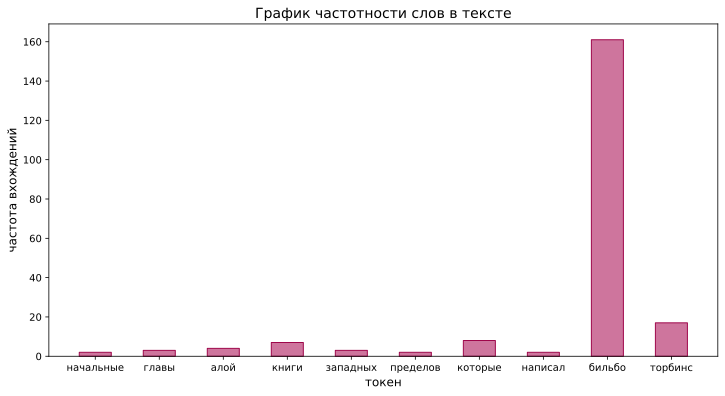

In [13]:
# визуализация графика частотности вхождения слов из текста 
x = list(word_count.keys())[18:28]
y = list(word_count.values())[18:28]

plt.bar(x, y, color='#ce759d', align='center', edgecolor='#9e064a', width=0.5)
plt.title('График частотности слов в тексте', fontsize=14)
plt.xlabel('токен', fontsize=12)
plt.ylabel('частота вхождений', fontsize=12)
plt.show()

<a id=4.2.></a>
#### 4.2. Создаём TreeMap
Визуализация относительного процента токенов в составе документа в виде сплошных занимаемых ими участков документа

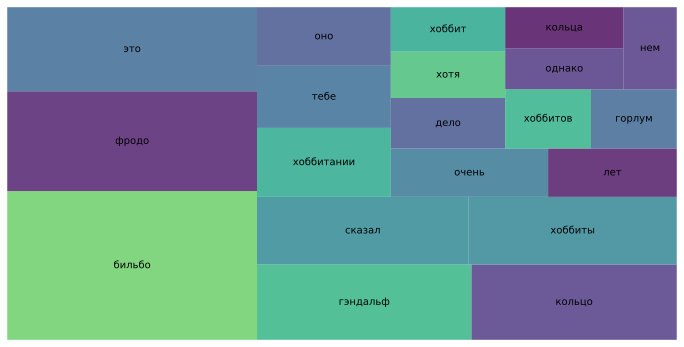

In [14]:
# делаем срез топ-20 рангов из всего массива данных
wc_top20 = wc[wc['ранг'] <= 20]

# график типа TreeMap
squarify.plot(sizes=wc_top20['процент от общего числа слов'], label=wc_top20['слово'], alpha=0.8)
plt.axis('off')
plt.show()

<a id=4.3.></a>
#### 4.3. Создаём облако слов

In [15]:
# из общего массива данных в работу берём слова и создаём из них сырой текст
data = wc['слово'].reset_index()
text = ' '.join(data['слово'])
text

'бильбо фродо это гэндальф кольцо сказал хоббиты хоббитании тебе оно очень лет дело хотя хоббит хоббитов горлум однако кольца нем всем время торбинс многие правда тех маг господин лишь жили день сказать знаю глаза никто знал горы те стал снова пор думал мое говорят говорили кому пока народ сэм подарки стали самые свое год просто кролы брендизайк старый гости однажды спросил эльфов долго вроде пусть оставил рождения девять жихарь стало чтото своим такие эльфы хоббита кольцом годы сто говорил отвечал словно мерри которые свой людей гномов крол четыре дни гостей мало вовсе жизни попрежнему запад давнымдавно реки хоббитам ибо сразу жизнь видно насчет жил несколько сколько пошел гэндальфа легче хочу книги которых нам вообще рукой нынче всей дней давно старого обычай свои ко слова дела собой среди свете кроме деле кармане горлума понял подарочек нашел взял слышал гномы дверь солнце поднялся оддо едва знаешь колец самых меньше нашей другие века какое когдато почему приречье говорить западного

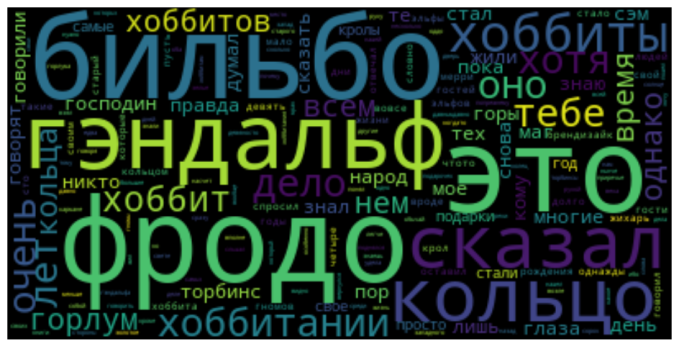

In [16]:
# визуализация графика типа облако слов
wordcloud = WordCloud(max_font_size=70).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [17]:
# сохраняем график в файл
wordcloud.to_file('wordcloud.png');

<img src="https://i.imgur.com/EapipMX.png" width=900>